In [11]:
import sys
sys.path.append('../../Utils/')

from utils import show
import cv2
import os
import json
from skimage.io import imread
import numpy as np
from PIL import Image

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


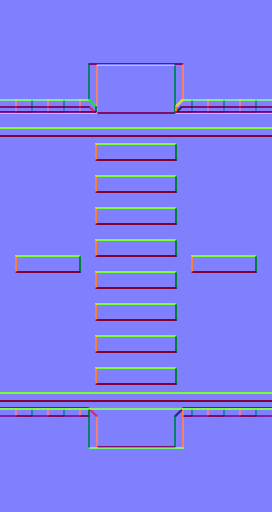

In [18]:
input_dir = 'Inputs'
ouput_dir = 'Outputs'

input_file = 'road-crosswalk-normal.png'
output_file = input_file.replace('.png', '_output.png')

input_path = os.path.join(input_dir, input_file)

image = Image.open(input_path)
display(image)

In [20]:
def rotate_image_x(image, angle):
    angle = np.deg2rad(angle)
    normal_map = np.array(image).astype(np.float32) / 255.0 

    print(angle)
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)

    rotation_matrix = np.array([
            [1, 0,          0         ],
            [0, cos_angle, -sin_angle],
            [0, sin_angle,  cos_angle]
        ])

    height, width, _ = normal_map.shape
    for y in range(height):
        for x in range(width):
            nx = normal_map[y, x, 0] * 2.0 - 1.0
            ny = normal_map[y, x, 1] * 2.0 - 1.0
            nz = normal_map[y, x, 2] * 2.0 - 1.0

            normal = np.array([nx, ny, nz])

            rotated_normal = np.dot(rotation_matrix, normal)

            rotated_normal = rotated_normal / np.linalg.norm(rotated_normal)

            normal_map[y, x, 0] = (rotated_normal[0] + 1.0) / 2.0
            normal_map[y, x, 1] = (rotated_normal[1] + 1.0) / 2.0
            normal_map[y, x, 2] = (rotated_normal[2] + 1.0) / 2.0

    rotated_image = (normal_map * 255).astype(np.uint8)
    output_image = Image.fromarray(rotated_image) 
    display(output_image)
    save_path = os.path.join(ouput_dir, output_file)
    output_image.save(save_path)

In [24]:
def rotate_image_z(image, angle):
    angle = np.deg2rad(angle)
    normal_map = np.array(image).astype(np.float32) / 255.0

    print(angle)
    cos_angle = np.cos(angle)
    sin_angle = np.sin(angle)

    rotation_matrix = np.array([
        [cos_angle, -sin_angle, 0],
        [sin_angle,  cos_angle, 0],
        [0,          0,         1]
    ])

    height, width, _ = normal_map.shape
    for y in range(height):
        for x in range(width):
            nx = normal_map[y, x, 0] * 2.0 - 1.0
            ny = normal_map[y, x, 1] * 2.0 - 1.0
            nz = normal_map[y, x, 2] * 2.0 - 1.0

            normal = np.array([nx, ny, nz])

            rotated_normal = np.dot(rotation_matrix, normal)

            rotated_normal = rotated_normal / np.linalg.norm(rotated_normal)

            normal_map[y, x, 0] = (rotated_normal[0] + 1.0) / 2.0
            normal_map[y, x, 1] = (rotated_normal[1] + 1.0) / 2.0
            normal_map[y, x, 2] = (rotated_normal[2] + 1.0) / 2.0

    rotated_image = (normal_map * 255).astype(np.uint8)
    output_image = Image.fromarray(rotated_image)
    display(output_image)
    # save_path = os.path.join(ouput_dir, output_file)
    # output_image.save(save_path)

0.5235987755982988


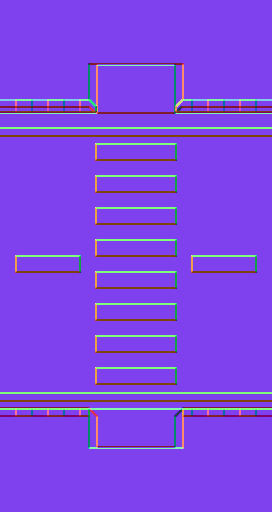

In [ ]:
rotate_image_x(image, 60)